In [5]:
import numpy as np, prjlib, plottools as pl, tools_y, tools_qrec, pickle, binning as bn, analysis as ana
from scipy.signal import savgol_filter
from matplotlib.pyplot import *

In [6]:
def plot_cov(cov,bins=None,xlab='L1',ylab='L2',zmin=-1,zmax=1,clab='cov'):
    #cor = np.corrcoef(dat,rowvar=0)
    # normalized by the diagonals
    dcov = np.diag(1./np.sqrt(np.diag(cov)))
    ncov = np.matmul(np.matmul(dcov,cov),dcov)
    if bins is None:
        bn = len(cov[0])
        x = np.linspace(1,bn,bn)
    else:
        x = bins
    xlabel(xlab)
    ylabel(ylab)
    pcolor(x,x,ncov,vmin=zmin,vmax=zmax)
    cb = colorbar()
    cb.set_label(clab,labelpad=20,rotation=270)
    axhline(10)
    axvline(10)
    show()

In [7]:
def prep_cov(mb,snmax=100,dtype='dr2_smica',mtype=0,cmask='Lmask',ytype='nilc',bhe=['lens'],fltr='cinv',outdir='../data/other/cov/'):

    if bhe is None:
        bh = 'bh-none'
    else:
        bh = 'bh-'+'-'.join(bhe)

    # tau x tau
    mtt, vtt, stt, ott = tools_qrec.load_binned_tt(mb,dtype=dtype,fltr=fltr,cmask=cmask,bhe=bhe)
    st = ana.PTEs(ott,stt-mtt,x1pte=True)

    # tau x y
    __, vty, sty, oty = tools_y.load_binned_ty(mb,dtype=dtype,mtype=mtype,cmask=cmask,ytype=ytype,fltr=fltr,bhe=bhe)
    st = ana.PTEs(oty,sty,x1pte=True)
    if mtype==0: ymask = 'G60'
    if mtype==1: ymask = 'G50'
    tag = dtype+'_'+cmask+'_'+ytype+'_'+ymask+'_'+bh
    
    # output spec
    ocb = np.concatenate((ott,oty))
    vcb = np.concatenate((vtt,vty))
    bc2 = np.concatenate((mb.bc,mb.bc))
    np.savetxt(outdir+'cl_'+tag+'.dat',np.array((bc2,ocb,vcb)).T)
    
    # calc cov
    scb = np.concatenate((stt,sty),axis=1)
    cov = np.cov(scb,rowvar=0)
    np.savetxt(outdir+'covariance_'+tag+'.dat',cov)

    # plot tau x tau
    pl.plot_1dstyle(fsize=[10,4],ylab=r'$10^5 LC_L^{\tau\tau}$',ymin=-1.5,ymax=1.5,xmin=mb.bp[0],xmax=mb.bp[-1])
    s = mb.bc * 1e5
    bns = len(mb.bc)
    errorbar(mb.bc,s*ocb[:bns],yerr=s*vcb[:bns],fmt='o')
    axhline(0,color='k',ls='--')
    savefig(outdir+'fig_tauxtau_'+tag+'.png')
    show()

    # plot tau x y
    pl.plot_1dstyle(fsize=[10,4],ylab=r'$10^8 L^2C_L^{\tau y}/2\pi$',ymin=-1,ymax=1,xmin=mb.bp[0],xmax=mb.bp[-1])
    #pl.plot_1dstyle(fsize=[10,4],ylab=r'$10^8 L^2C_L^{\tau y}/2\pi$',ymin=-.4,ymax=.4,xmin=mb.bp[0],xmax=mb.bp[-1])
    s = mb.bc**2/(2*np.pi)*1e8
    errorbar(mb.bc,s*ocb[bns:],yerr=s*vcb[bns:],fmt='o')
    axhline(0,color='k',ls='--')
    savefig(outdir+'fig_tauxy_'+tag+'.png')
    show()
    
    # plot covariance
    plot_cov(cov)

    return bc2, ocb, vcb, cov

chi: -3.0 , chi (sim mean): 0.0 , chi (sim std): 2.8 , PTE: 0.34 
chi^2: 5.7 , chi^2 (sim): 11.1 , PTE: 0.86 
chi: 1.1 , chi (sim mean): 0.0 , chi (sim std): 3.1 , PTE: 0.68 
chi^2: 5.3 , chi^2 (sim): 11.1 , PTE: 0.90 


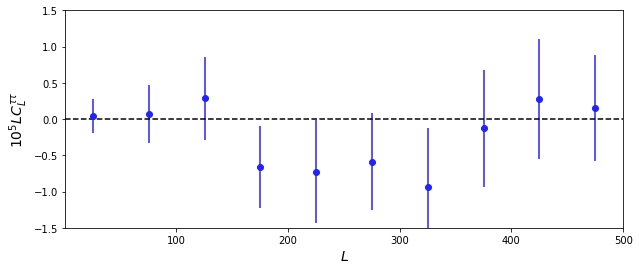

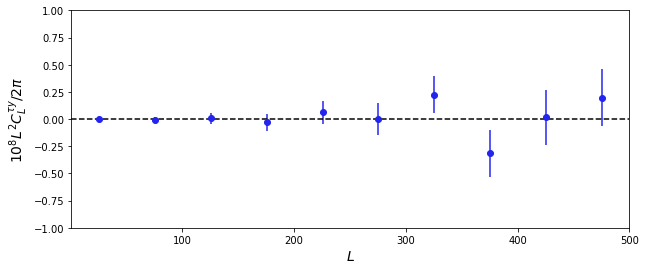

/global/homes/t/toshiyan/.conda/envs/loc/lib/python3.7/site-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  del sys.path[0]


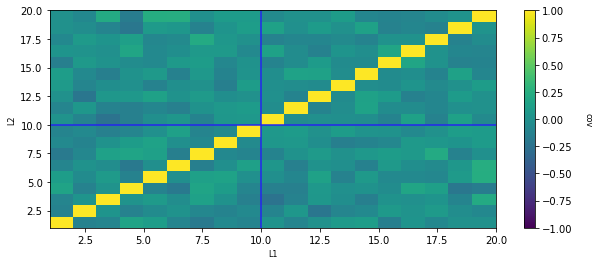

In [8]:
#mb = bn.multipole_binning(10,lmin=1,lmax=2048)
mb = bn.multipole_binning(10,lmin=1,lmax=500)
bc2, ocb, vcb, cov = prep_cov(mb)

chi: 0.9 , chi (sim mean): 0.0 , chi (sim std): 4.3 , PTE: 0.74 
chi^2: 7.8 , chi^2 (sim): 11.1 , PTE: 0.71 
chi: 0.9 , chi (sim mean): -0.0 , chi (sim std): 3.6 , PTE: 0.74 
chi^2: 8.9 , chi^2 (sim): 11.2 , PTE: 0.58 


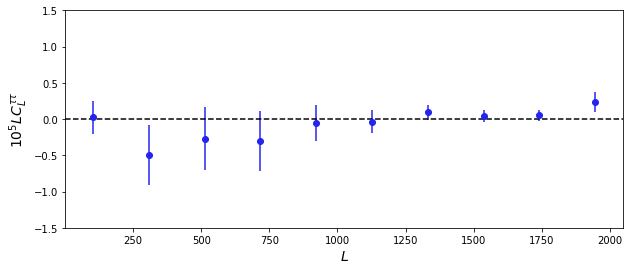

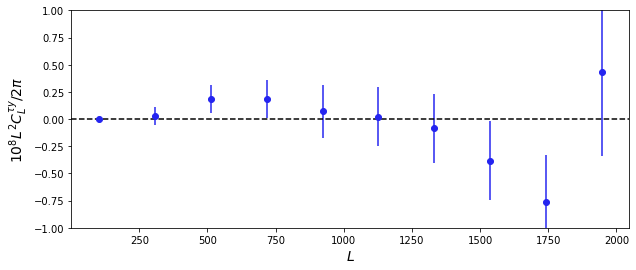

/global/homes/t/toshiyan/.conda/envs/loc/lib/python3.7/site-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  del sys.path[0]


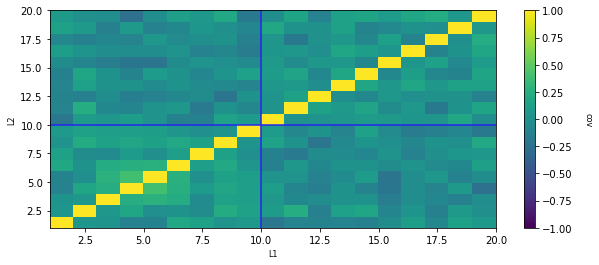

In [5]:
mb = bn.multipole_binning(10,lmin=1,lmax=2048)
__, ocb, vcb0, cov0 = prep_cov(mb,dtype='dr2_nilc')

In [6]:
#mb = bn.multipole_binning(10,lmin=1,lmax=2048)
#__, ocb2, vcb2, cov2 = prep_cov(mb,snmax=100,cmask='G60Lmask')

chi: -5.3 , chi (sim mean): -0.0 , chi (sim std): 4.4 , PTE: 0.18 
chi^2: 22.4 , chi^2 (sim): 11.2 , PTE: 0.04 
chi: 0.7 , chi (sim mean): -0.0 , chi (sim std): 2.8 , PTE: 0.84 
chi^2: 13.8 , chi^2 (sim): 11.1 , PTE: 0.28 


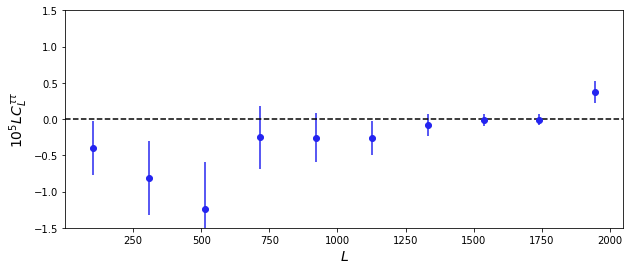

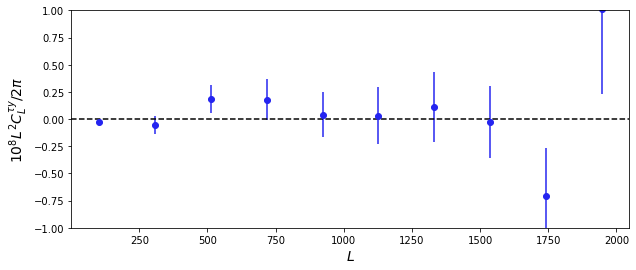

/global/homes/t/toshiyan/.conda/envs/loc/lib/python3.7/site-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  del sys.path[0]


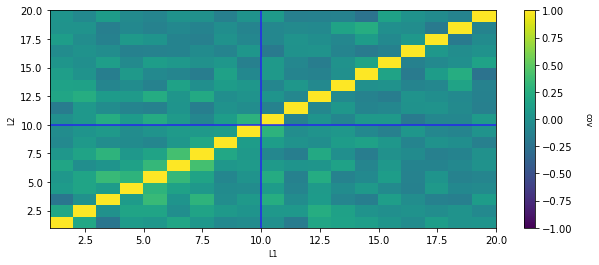

In [7]:
mb = bn.multipole_binning(10,lmin=1,lmax=2048)
__, ocb0, vcb0, cov0 = prep_cov(mb,dtype='dr3_nosz',bhe='lens-src',cmask='LmaskDR3')

Plot Correlation Coefficients

Other cases

chi: -4.5 , chi (sim mean): 0.0 , chi (sim std): 3.7 , PTE: 0.22 
chi^2: 16.7 , chi^2 (sim): 11.2 , PTE: 0.18 
chi: -4.6 , chi (sim mean): -0.0 , chi (sim std): 3.3 , PTE: 0.12 
chi^2: 15.1 , chi^2 (sim): 11.2 , PTE: 0.22 


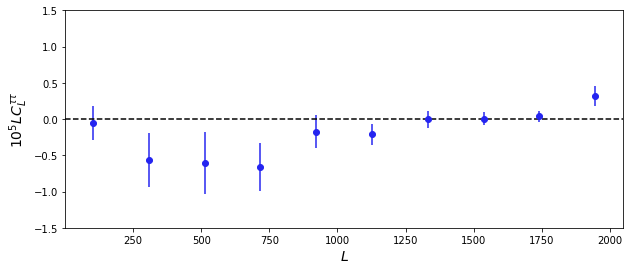

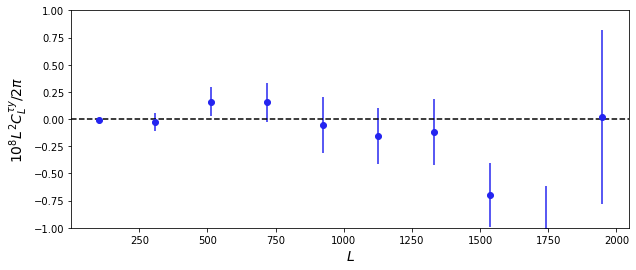

/global/homes/t/toshiyan/.conda/envs/loc/lib/python3.7/site-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  del sys.path[0]


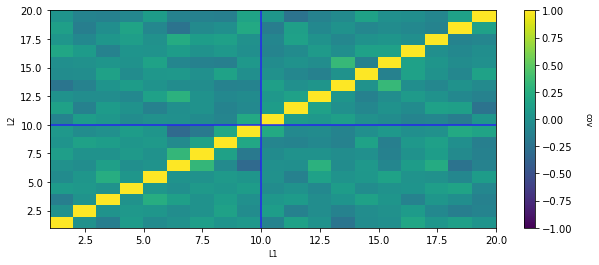

chi: -4.5 , chi (sim mean): 0.0 , chi (sim std): 3.7 , PTE: 0.22 
chi^2: 16.7 , chi^2 (sim): 11.2 , PTE: 0.18 
chi: -3.8 , chi (sim mean): -0.0 , chi (sim std): 3.1 , PTE: 0.22 
chi^2: 7.6 , chi^2 (sim): 11.1 , PTE: 0.76 


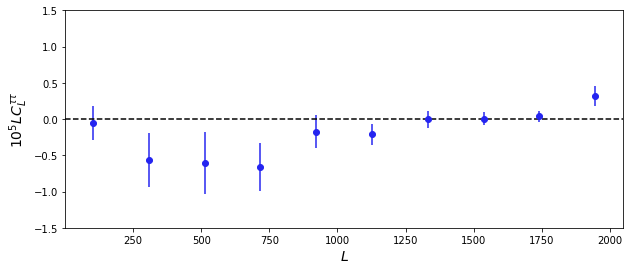

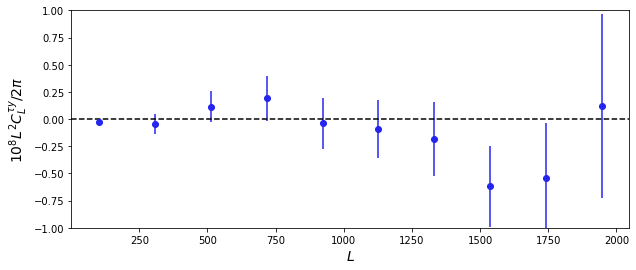

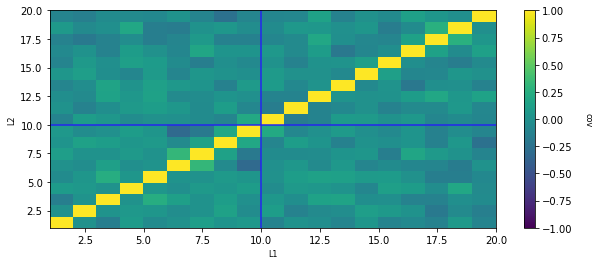

In [8]:
mb = bn.multipole_binning(10,lmin=1,lmax=2048)
__, ocb1, vcb1, cov1 = prep_cov(mb,ytype='milca')
__, ocb3, vcb3, cov3 = prep_cov(mb,mtype=1)
#__, ocb4, vcb4, cov4 = prep_cov(mb,est='bh-lens')
#__, ocb5, vcb5, cov5 = prep_cov(mb,est='')